# Import Dependencies

In [ ]:

import pandas as pd # pandas used for data manipulation
import matplotlib.pyplot as plt # used for visulization
import numpy as np     # numpy used for numarical computation
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OneHotEncoder # used for encode catagorical data
from sklearn.model_selection import train_test_split # split data into training and testing



import tensorflow # Dl library used for building models
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer # used for tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences # used for add zero padding and carete sequences

from tensorflow.keras.models import Sequential # used for building model

from tensorflow.keras.layers import Dense,SimpleRNN,Embedding,Input,BatchNormalization,Dropout,LSTM,GRU,Bidirectional # RNNs models
from tensorflow.keras.callbacks import EarlyStopping

import gensim # gensim used for embedding in which has word2v embedding method
from gensim.models import Word2Vec,KeyedVectors

import warnings
warnings.filterwarnings("ignore")

# Load data

In [ ]:
df=pd.read_csv("spam mail.csv")

In [ ]:
df.head()

,Category,Masseges
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Masseges  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Feature engineering

In [ ]:
df.isnull().sum()

Category    0
Masseges    0
dtype: int64

In [ ]:
df.isnull().sum()/df.shape[0]*100

Category    0.0
Masseges    0.0
dtype: float64

In [ ]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='Category'>

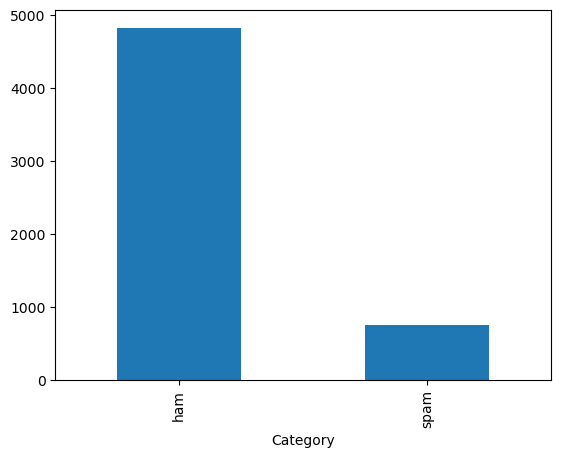

In [ ]:
df['Category'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

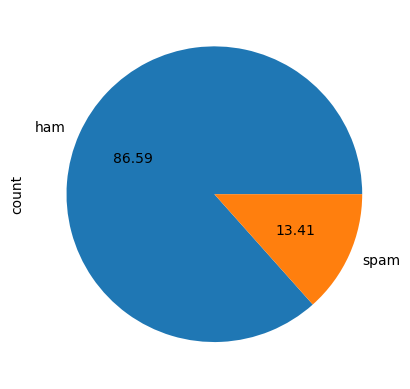

In [ ]:
df['Category'].value_counts().plot(kind='pie',autopct='%.2f')

# Text preprocessing
we follow these steps
1 lower case

2 remove Tags

3 remove URLs

4 Remove punctuations

5 chat word treatment

6 spelling corection

7 remove stopwords

8 handling emjoy

9 Tokenization

10 stemming

11 lemmitization


In [ ]:
df.head()

,Category,Masseges
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['Masseges'].str.lower()

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: Masseges, Length: 5572, dtype: object

In [ ]:
df['Masseges']=df['Masseges'].str.lower()

In [ ]:
#Remove tags
import re

def remove_tegs(text):
    pattren=re.compile("<.*?>")
    return pattren.sub(r'',text)

In [ ]:
df['Masseges'].apply(remove_tegs)

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: Masseges, Length: 5572, dtype: object

In [ ]:
df['Masseges']=df['Masseges'].apply(remove_tegs)

In [ ]:
#Remove Urls
def remove_url(text):
    pattren=re.compile('https?://\S+|www\.\S+')
    return pattren.sub(r'',text)

In [ ]:
df['Masseges'].apply(remove_url)

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: Masseges, Length: 5572, dtype: object

In [ ]:
df['Masseges']=df['Masseges'].apply(remove_tegs)

In [ ]:
# Remove punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_pun(text):
    return text.translate(str.maketrans('','',string.punctuation))

In [ ]:
df['Masseges'].apply(remove_pun)

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                  will ì b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: Masseges, Length: 5572, dtype: object

In [ ]:
df['Masseges']=df['Masseges'].apply(remove_pun)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\T L
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords.words("english")

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
stopwords.words("french")

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [ ]:
#Remove stopwords of english becoz our Sentence in english
def remove_stopword(text):
    stopword=set(stopwords.words('english')) # convert to set for faster lokip
    wrd=[word for word in text.split() if word.lower() not in stopword]
    return" ".join(wrd)

In [ ]:
df['Masseges'].apply(remove_stopword)

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u å£750 pound prize...
5568                          ì b going esplanade fr home
5569                          pity mood soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: Masseges, Length: 5572, dtype: object

In [ ]:
df['Masseges']=df['Masseges'].apply(remove_stopword)

In [ ]:
def remove_emojoy(text):
    emoji_pattern = re.compile(
        r"[\U0001F600-\U0001F64F]"  # Emoticons
        r"|[\U0001F300-\U0001F5FF]"  # Symbols & pictographs
        r"|[\U0001F680-\U0001F6FF]"  # Transport & map symbols
        r"|[\U0001F1E0-\U0001F1FF]"  # Flags (iOS)
        r"|[\U00002600-\U000026FF]"  # Misc symbols (sun, star, etc.)
        r"|[\U00002700-\U000027BF]",  # Dingbats
        re.UNICODE
    )

    return emoji_pattern.sub('', text)  # Remove emojis

In [ ]:
df['Masseges']=df['Masseges'].apply(remove_emojoy)

In [ ]:
#stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def stem(text):
    return" ".join([ps.stem(word) for word in text.split()])

In [ ]:
df['Masseges'].apply(stem)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u å£750 pound prize 2...
5568                              ì b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: Masseges, Length: 5572, dtype: object

In [ ]:
df['Masseges']=df['Masseges'].apply(stem)

# Split data into traning and testing

In [ ]:
X=df['Masseges']
y=df['Category']

In [ ]:
X

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u å£750 pound prize 2...
5568                              ì b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: Masseges, Length: 5572, dtype: object

In [ ]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

df['Category']=lb.fit_transform(df['Category'])

In [ ]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64

# Tokenize

In [ ]:
tokenizer=Tokenizer(num_words=10000,oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# create sequences

In [ ]:
X_train_seq=tokenizer.texts_to_sequences(X_train)
X_test_seq=tokenizer.texts_to_sequences(X_test)

# cehck every seq len

In [ ]:
maxlen=max(len(seq) for seq in X_train_seq)
print(maxlen)

80


# add zero padding

In [ ]:
X_train_pad=pad_sequences(X_train_seq,maxlen=maxlen,padding='post')
X_test_pad=pad_sequences(X_test_seq,maxlen=maxlen,padding='post')

In [ ]:
X_train_pad=np.array(X_train_pad)
X_test_pad=np.array(X_test_pad)

In [ ]:
X_train_pad[0:3]

array([[ 307,  271,   95, 1362,  432, 3242,  911,  265,  223,  471,  817,
          70,    3, 1012, 3243, 3244, 3245, 3246,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [ 433,   47,   15,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           

In [ ]:
X_train_pad

array([[307, 271,  95, ...,   0,   0,   0],
       [433,  47,  15, ...,   0,   0,   0],
       [ 34, 433, 151, ...,   0,   0,   0],
       ...,
       [ 83, 269,  17, ...,   0,   0,   0],
       [ 83,  26, 871, ...,   0,   0,   0],
       [ 72,   0,   0, ...,   0,   0,   0]])

# Model building of SimpleRNN

In [ ]:
maxlen=maxlen
model=Sequential([
    Input(shape=(maxlen,)),

    Embedding(input_dim=10000,output_dim=64,input_length=maxlen),

    SimpleRNN(150,return_sequences=True),
    Dropout(0.3),

    SimpleRNN(150,return_sequences=False),
    Dropout(0.3),




    Dense(256,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)),
    Dropout(0.3),
    BatchNormalization(),




    Dense(1,activation='sigmoid')



])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 80, 64)              │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 80, 150)             │          32,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 80, 150)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 150)                 │          45,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          38,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 757,337 (2.89 MB)

 Trainable params: 756,825 (2.89 MB)

 Non-trainable params: 512 (2.00 KB)

# set learning rate

In [ ]:
RMSprop=keras.optimizers.RMSprop(learning_rate=0.0005)

# set loss,optimizer parametors

In [ ]:
model.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=['accuracy'])

# Earlystop

In [ ]:
early=EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=4,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

# model training of RNN

In [ ]:
history=model.fit(X_train_pad,y_train,epochs=10,validation_data=(X_test_pad,y_test),callbacks=[early])

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 28s 93ms/step - accuracy: 0.6359 - loss: 4.5503 - val_accuracy: 0.8780 - val_loss: 1.4679
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.8378 - loss: 1.3255 - val_accuracy: 0.8780 - val_loss: 0.8055
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 0.8587 - loss: 0.7842 - val_accuracy: 0.8780 - val_loss: 0.5842
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - accuracy: 0.8601 - loss: 0.5809 - val_accuracy: 0.8780 - val_loss: 0.4759
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.8521 - loss: 0.5222 - val_accuracy: 0.8780 - val_loss: 0.4105
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.8471 - loss: 0.4790 - val_accuracy: 0.8780 - val_loss: 0.3526
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.8618 - loss: 0.3693 - val_accuracy: 0.9067 - val_loss: 0.3068
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.9205 - loss: 0.2706 - 

# visulize model performance

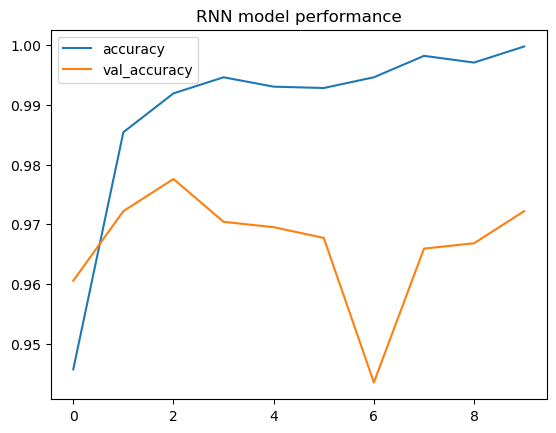

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title("RNN model performance")
plt.legend()
plt.show()

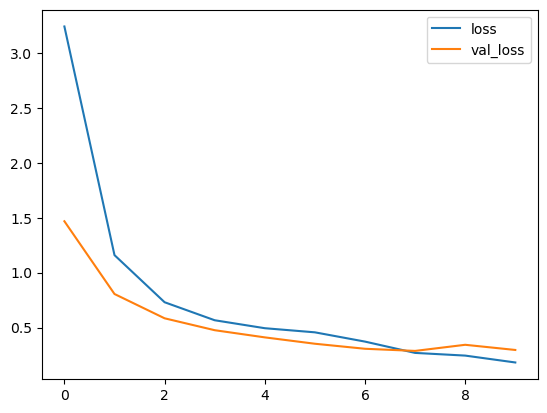

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

# model building of LSTM

In [ ]:
import tensorflow as tf

model_lstm = Sequential([
    Input(shape=(maxlen,)),

    Embedding(input_dim=10000, output_dim=64, input_length=maxlen),

    LSTM(128, return_sequences=True),
    Dropout(0.3),

    LSTM(64, return_sequences=True),
    Dropout(0.3),

    LSTM(64, return_sequences=False),
    Dropout(0.3),

    BatchNormalization(),

    Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.03)),
    Dropout(0.3),

    Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.03)),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

In [ ]:
model_lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 80, 64)              │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 80, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 80, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 80, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 80, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 904,193 (3.45 MB)

 Trainable params: 904,065 (3.45 MB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
model_lstm.get_weights

<bound method Layer.get_weights of <Sequential name=sequential_2, built=True>>

# Set learning rate

In [ ]:
RMSprop=keras.optimizers.RMSprop(learning_rate=0.0005)

In [ ]:
model_lstm.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# model traning

In [ ]:
history_lstm=model.fit(X_train_pad,y_train,epochs=10,validation_data=(X_test_pad,y_test))

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - accuracy: 0.9519 - loss: 0.1870 - val_accuracy: 0.9238 - val_loss: 0.3016
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.9656 - loss: 0.1492 - val_accuracy: 0.9112 - val_loss: 0.3312
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.9714 - loss: 0.1407 - val_accuracy: 0.9202 - val_loss: 0.2760
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.9730 - loss: 0.1313 - val_accuracy: 0.9193 - val_loss: 0.3561
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.9804 - loss: 0.1035 - val_accuracy: 0.8305 - val_loss: 1.0084
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.9559 - loss: 0.2121 - val_accuracy: 0.9318 - val_loss: 0.3052
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.9763 - loss: 0.1279 - val_accuracy: 0.9157 - val_loss: 0.3928
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9794 - loss: 0.1123 - 

# visulize model performance

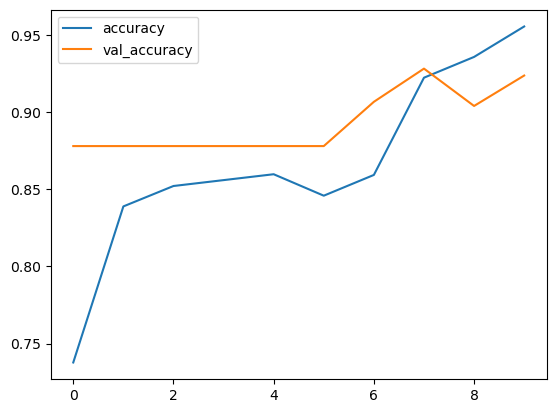

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

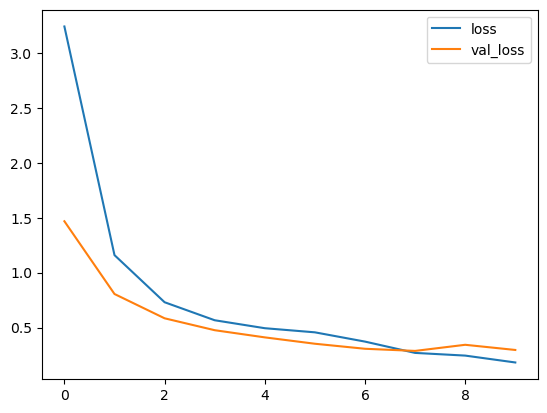

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

# GRU(Gated recurent unit) model building

In [ ]:
maxlen=maxlen

model=Sequential([
    Input(shape=(maxlen,)),
    Embedding(input_dim=10000,output_dim=64,input_length=maxlen),

    GRU(150,return_sequences=True),
    Dropout(0.3),

    GRU(128,return_sequences=False),
    Dropout(0.3),


    Dense(256,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)),
    Dropout(0.3),
    BatchNormalization(),

    Dense(85,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)),
    Dropout(0.3),
    BatchNormalization(),


    Dense(1,activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 80, 64)              │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 80, 150)             │          97,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 80, 150)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 128)                 │         107,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 85)                  │          21,845 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 85)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 85)                  │             340 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              86 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 901,039 (3.44 MB)

 Trainable params: 900,357 (3.43 MB)

 Non-trainable params: 682 (2.66 KB)

In [ ]:
RMSprop=keras.optimizers.RMSprop(learning_rate=0.0005)

In [ ]:
model.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train_pad,y_train,epochs=10,validation_data=(X_test_pad,y_test))

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 52s 236ms/step - accuracy: 0.5859 - loss: 6.6839 - val_accuracy: 0.8780 - val_loss: 1.9385
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 39s 221ms/step - accuracy: 0.8116 - loss: 1.5873 - val_accuracy: 0.8780 - val_loss: 0.8637
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 31s 218ms/step - accuracy: 0.8395 - loss: 0.8352 - val_accuracy: 0.8780 - val_loss: 0.6052
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 31s 224ms/step - accuracy: 0.8549 - loss: 0.6120 - val_accuracy: 0.8780 - val_loss: 0.5107
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 31s 223ms/step - accuracy: 0.8619 - loss: 0.5244 - val_accuracy: 0.8780 - val_loss: 0.4449
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 31s 221ms/step - accuracy: 0.8667 - loss: 0.4689 - val_accuracy: 0.8780 - val_loss: 0.4275
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 32s 225ms/step - accuracy: 0.8665 - loss: 0.4544 - val_accuracy: 0.8780 - val_loss: 0.4137
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 31s 220ms/step - accuracy: 0.8622 - loss: 0

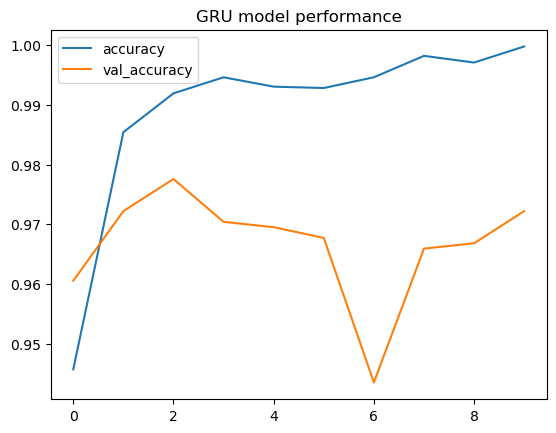

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title("GRU model performance")
plt.legend()
plt.show()

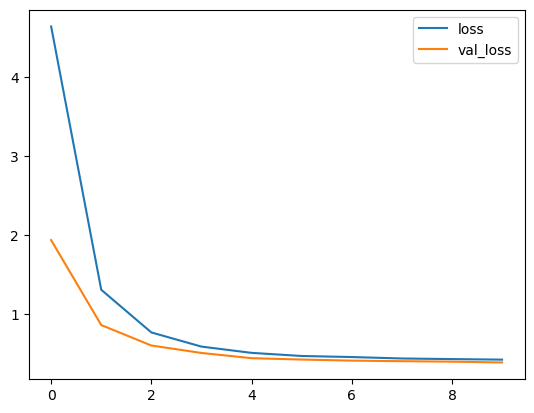

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

# BidrectionalRNN model building

In [ ]:
model = Sequential([
    Input(shape=(maxlen,)),

    Embedding(input_dim=10000, output_dim=64, input_length=maxlen),

    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.3),

    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),

    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.3),

    BatchNormalization(),

    Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.03)),
    Dropout(0.3),

    Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.03)),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 80, 64)              │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 80, 256)             │         197,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 80, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 80, 128)             │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 80, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,200,385 (4.58 MB)

 Trainable params: 1,200,129 (4.58 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
RMSprop=keras.optimizers.RMSprop(learning_rate=0.001)

In [ ]:
model.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train_pad,y_train,epochs=10,validation_data=(X_test_pad,y_test))

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 76s 350ms/step - accuracy: 0.9033 - loss: 5.8904 - val_accuracy: 0.9605 - val_loss: 0.2133
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 45s 324ms/step - accuracy: 0.9886 - loss: 0.1062 - val_accuracy: 0.9722 - val_loss: 0.1518
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 45s 323ms/step - accuracy: 0.9932 - loss: 0.0609 - val_accuracy: 0.9776 - val_loss: 0.1289
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 46s 330ms/step - accuracy: 0.9929 - loss: 0.0524 - val_accuracy: 0.9704 - val_loss: 0.1515
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 46s 328ms/step - accuracy: 0.9923 - loss: 0.0614 - val_accuracy: 0.9695 - val_loss: 0.1627
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 47s 333ms/step - accuracy: 0.9944 - loss: 0.0469 - val_accuracy: 0.9677 - val_loss: 0.2030
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 48s 340ms/step - accuracy: 0.9972 - loss: 0.0323 - val_accuracy: 0.9435 - val_loss: 0.3812
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 46s 326ms/step - accuracy: 0.9986 - loss: 0

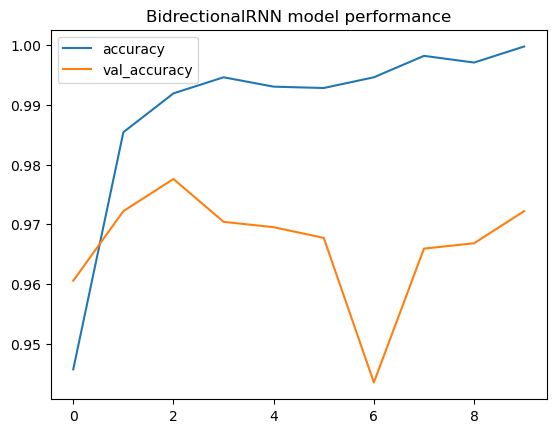

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title("BidrectionalRNN model performance")
plt.legend()
plt.show()

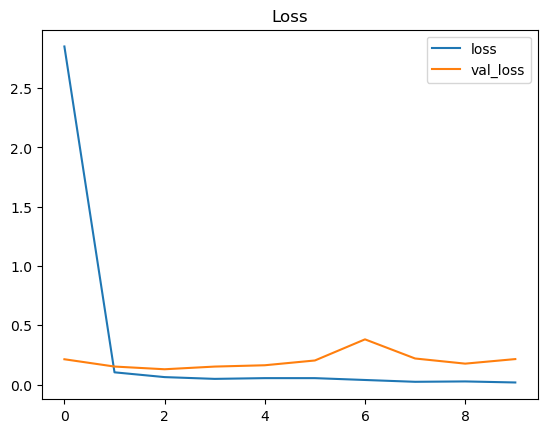

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title("Loss")
plt.legend()
plt.show()